## EDA (Exploratory Data Analysis)

In [ ]:

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

## Data cleaning

In [270]:
#job_posted_date object --> datetime

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df['job_posted_date'][0]

Timestamp('2023-06-16 13:44:15')

In [271]:
# job_skills object --> list

def reformat_skills(skill):
    if pd.notna(skill):
        return ast.literal_eval(skill)
    
df['job_skills'] = df['job_skills'].apply(reformat_skills)

In [10]:
type(df['job_skills'][1])

list

### data analysis

### job_title_explore

In [53]:
df_plot_job_title =df['job_title_short'].value_counts().to_frame()
df_plot_job_title

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


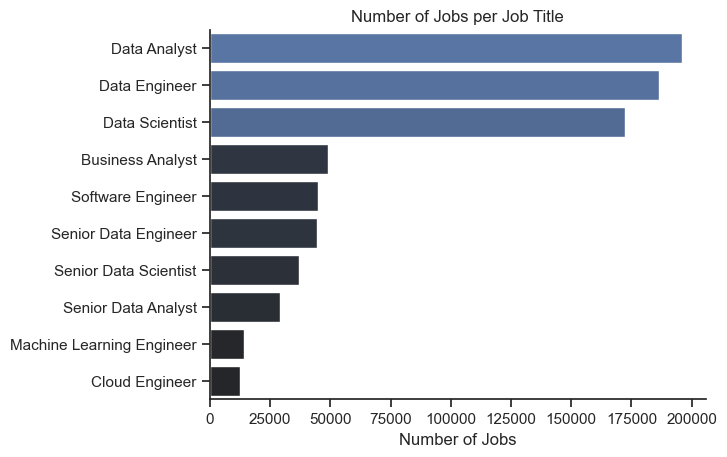

In [ ]:
sns.barplot(data =df_plot_job_title , x ='count' , y=df_plot_job_title.index , hue='count', legend= False  ,palette='dark:b' )
plt.title('Number of Jobs per Job Title')
plt.ylabel('')
plt.xlabel('Number of Jobs')
sns.despine()
plt.show()


### Companies to Explore

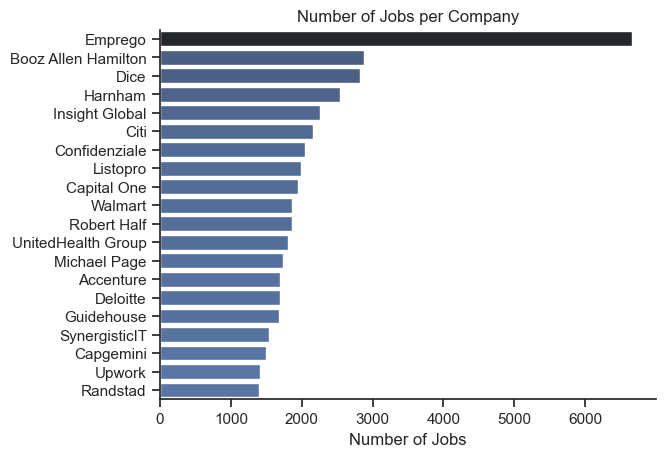

In [89]:
df_plot =df['company_name'].value_counts().head(20).to_frame()
sns.barplot(data =df_plot , x ='count' , y=df_plot.index , hue='count', legend= False , palette='dark:b_r' )
sns.despine()
plt.title('Number of Jobs per Company')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()



### Countries Explore 

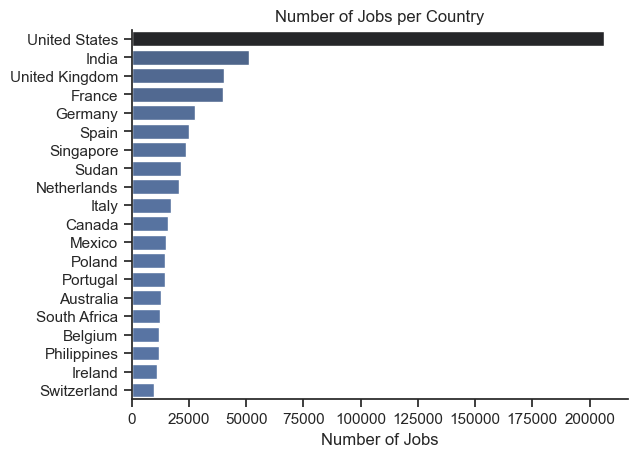

In [87]:
df_plot_country =df['job_country'].value_counts().head(20).to_frame()
sns.barplot(data =df_plot_country , x ='count' , y=df_plot_country.index , hue='count', legend= False , palette='dark:b_r' )
sns.despine()
plt.title('Number of Jobs per Country')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()



### Job Oppertunities

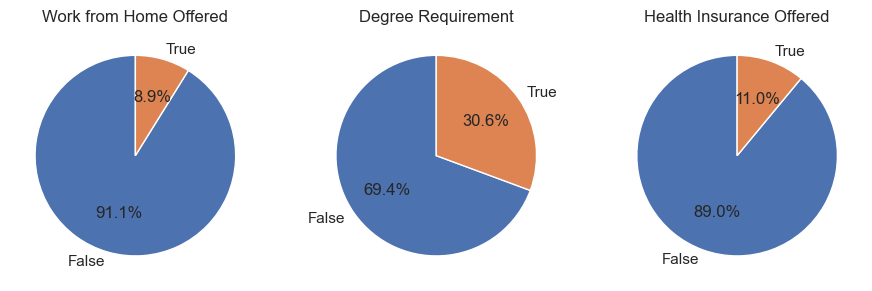

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i ,(column , title ) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts() , labels=['False' , 'True'] , autopct='%1.1f%%' , startangle=90 )
    ax[i].set_title(title)

### explore job schedule type

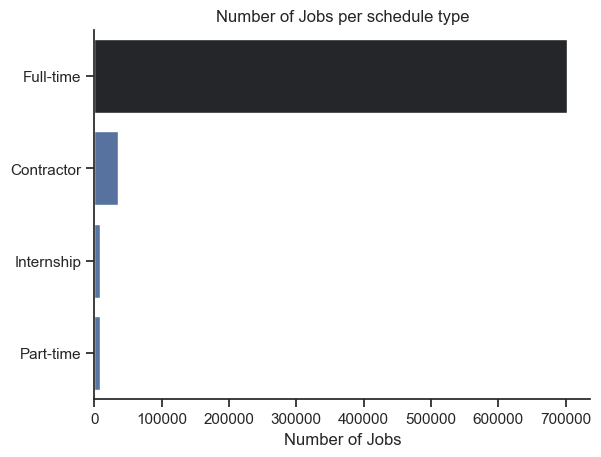

In [ ]:
df_plot_schedule =df['job_schedule_type'].value_counts().head(4).to_frame()
sns.barplot(data =df_plot_schedule , x = y=df_plot_schedule.index , hue='count', legend= False , palette='dark:b_r' )
sns.despine()
plt.title('Number of Jobs per schedule type')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()



## Determine The Highest Paid Skills and Most Demanded Skills

In [275]:
df_explode = df.explode('job_skills')

In [278]:
df_DA = df_explode[df_explode['job_title_short']  == "Data Analyst"].copy()

In [279]:
df_DA_top_pay = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
svn,1,400000.0
solidity,1,179000.0
dplyr,3,167500.0
terraform,3,163782.0
gitlab,7,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0


In [281]:
df_DA_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


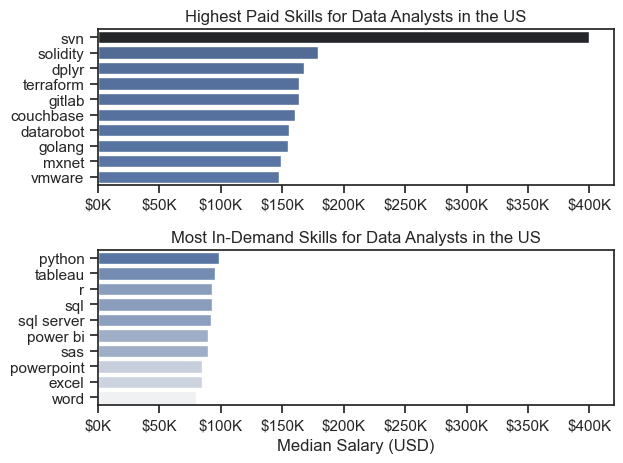

In [282]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

## What is the most optimal skill to learn for Data Analysts?

In [288]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df[df['job_title_short'] == 'Data Analyst'].dropna(subset='salary_year_avg'))  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
...,...,...,...
svn,1,400000.0,0.018345
wrike,1,75000.0,0.018345
selenium,1,82500.0,0.018345


In [289]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

In [290]:
job_countries =df['job_country'].unique().tolist()
job_countries

['United States',
 'Mexico',
 'Germany',
 'Sudan',
 'Romania',
 'Denmark',
 'Switzerland',
 'France',
 'Brazil',
 'United Kingdom',
 'India',
 'Poland',
 'Belgium',
 'Russia',
 'Serbia',
 'Singapore',
 'Costa Rica',
 'Ireland',
 'Italy',
 'Malaysia',
 'Canada',
 'Uruguay',
 'Namibia',
 'Estonia',
 'Israel',
 'Hungary',
 'Austria',
 'Philippines',
 'Egypt',
 'Australia',
 'Chile',
 'Spain',
 'Netherlands',
 'South Africa',
 'Colombia',
 'Hong Kong',
 'Kuwait',
 'Finland',
 'Luxembourg',
 'China',
 'Puerto Rico',
 'Sweden',
 'Saudi Arabia',
 'Argentina',
 'Turkey',
 'Panama',
 'Nigeria',
 'New Zealand',
 'Ukraine',
 'Jordan',
 'United Arab Emirates',
 'Armenia',
 'Pakistan',
 'Lesotho',
 'Mauritius',
 'Portugal',
 'Bahrain',
 'Taiwan',
 "Côte d'Ivoire",
 'U.S. Virgin Islands',
 'Réunion',
 'Kazakhstan',
 'Lithuania',
 'Moldova',
 'Belarus',
 'Cyprus',
 'Bulgaria',
 'Honduras',
 'Czechia',
 'Peru',
 'South Korea',
 'Malta',
 'Indonesia',
 'Tunisia',
 'Latvia',
 'Slovakia',
 'Lebanon',
 'J

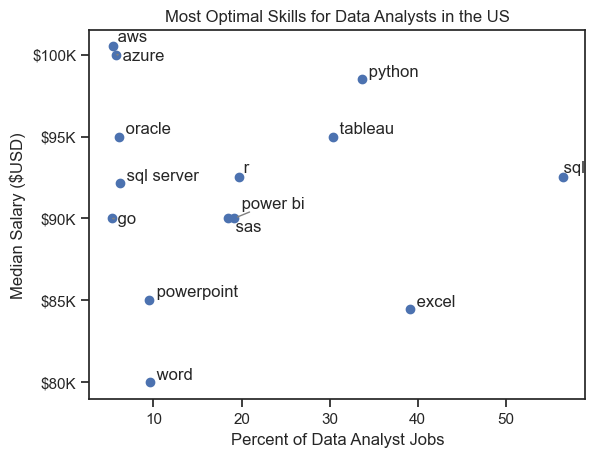

In [291]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [66]:
if 'Egypt' in job_countries :
    print('ok')
else :
    print('no')

ok


## Exploratory Data Analysis for Data Analysts in the Egypt

In [201]:
df_DA_Egy =df[(df['job_country'] =='Egypt' )  & (df['job_title_short'] == 'Data Analyst')]

### Explore locations 

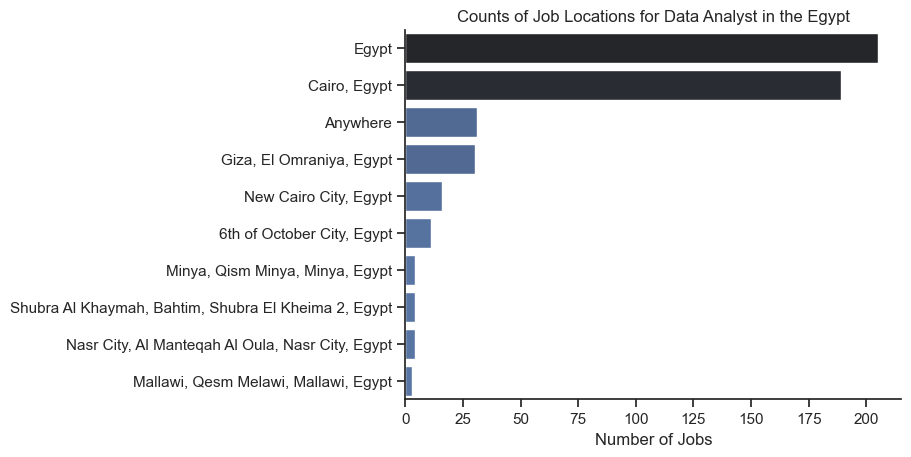

In [80]:
df_plot = df_DA_Egy['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the Egypt')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [83]:
df_DA_Egy['job_health_insurance'].value_counts()

job_health_insurance
False    529
Name: count, dtype: int64

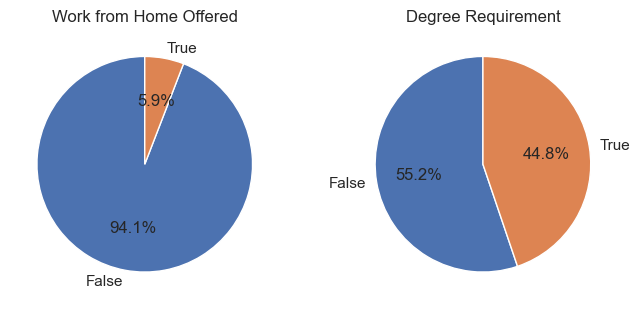

In [85]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
   
}

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

for i ,(column , title ) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_Egy[column].value_counts() , labels=['False' , 'True'] , autopct='%1.1f%%' , startangle=90 )
    ax[i].set_title(title)

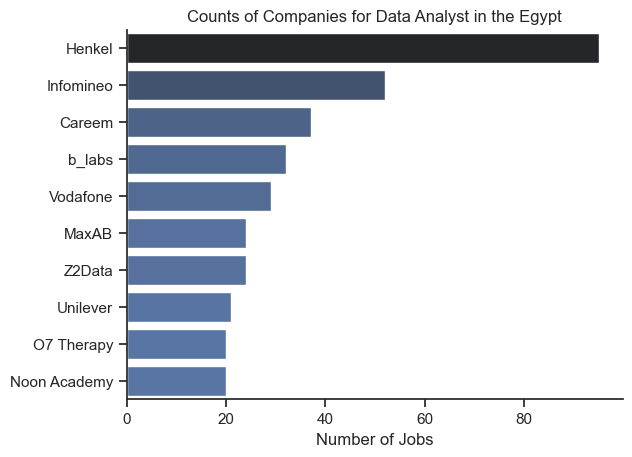

In [265]:
df_plot = df_DA_Egy['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the Egypt')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## What are the most demanded skills for the top 3 most popular data roles?

In [234]:
#filter data for Egypt
df_Egy = df[df['job_country'] =='Egypt']

## Explode Skills

In [98]:
df_skills = df_Egy.explode('job_skills')

In [99]:
df_skills[['job_title_short' , 'job_skills']]

,job_title_short,job_skills
83,Software Engineer,bash
83,Software Engineer,python
83,Software Engineer,aws
83,Software Engineer,linux
83,Software Engineer,splunk
...,...,...
785558,Business Analyst,looker
785587,Business Analyst,python
785587,Business Analyst,power bi
785587,Business Analyst,dax


## Count Skills per Job Title

In [115]:
df_skills_count =df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count =df_skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by ='skill_count' , ascending= False , inplace=True)

In [ ]:
df_skills_count

,job_skills,job_title_short,skill_count
586,python,Data Engineer,270
753,sql,Data Engineer,251
587,python,Data Scientist,239
752,sql,Data Analyst,199
754,sql,Data Scientist,185
721,spark,Data Engineer,175
757,sql,Senior Data Engineer,167
192,excel,Data Analyst,167
47,aws,Data Engineer,165
585,python,Data Analyst,157


## create list for 3 top role 

In [122]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles =sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

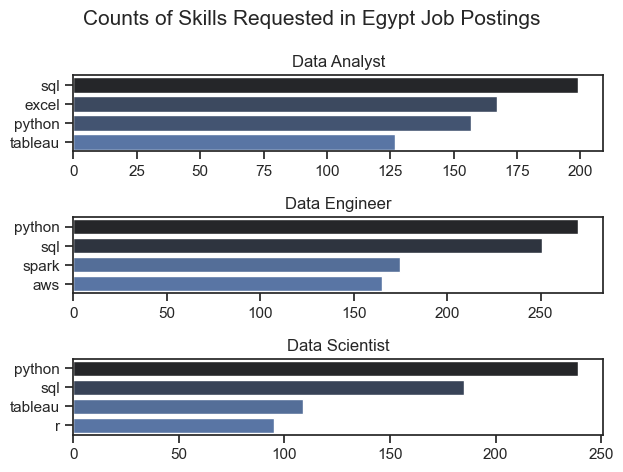

In [132]:
fig , ax = plt.subplots(3 , 1)

for i , title in enumerate(job_titles) :
    sns.barplot(df_skills_count[df_skills_count['job_title_short'] == title].head(4) ,
                x ='skill_count' , y= 'job_skills' ,
                ax = ax[i] , hue='skill_count' ,
                palette='dark:b_r' , legend= False)
    
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
fig.suptitle('Counts of Skills Requested in Egypt Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

## Convert Counts to Percentages


In [148]:
df_job = df_Egy['job_title_short'].value_counts().reset_index(name= 'total_count')
df_job

,job_title_short,total_count
0,Data Analyst,529
1,Data Scientist,512
2,Data Engineer,494
3,Business Analyst,325
4,Software Engineer,286
5,Senior Data Engineer,263
6,Senior Data Scientist,166
7,Senior Data Analyst,143
8,Machine Learning Engineer,107
9,Cloud Engineer,107


In [149]:
df_skills_count

,job_skills,job_title_short,skill_count
586,python,Data Engineer,270
753,sql,Data Engineer,251
587,python,Data Scientist,239
752,sql,Data Analyst,199
754,sql,Data Scientist,185
...,...,...,...
4,airflow,Machine Learning Engineer,1
896,yarn,Software Engineer,1
897,zoom,Business Analyst,1
898,zoom,Data Engineer,1


In [150]:
df_prec = df_skills_count.merge(df_job , on ='job_title_short' , how='left')
df_prec['skill_percent'] = (df_prec['skill_count'] /df_prec['total_count']) * 100

In [151]:
df_prec

,job_skills,job_title_short,skill_count,total_count,skill_percent
0,python,Data Engineer,270,494,54.655870
1,sql,Data Engineer,251,494,50.809717
2,python,Data Scientist,239,512,46.679688
3,sql,Data Analyst,199,529,37.618147
4,sql,Data Scientist,185,512,36.132812
...,...,...,...,...,...
895,airflow,Machine Learning Engineer,1,107,0.934579
896,yarn,Software Engineer,1,286,0.349650
897,zoom,Business Analyst,1,325,0.307692
898,zoom,Data Engineer,1,494,0.202429


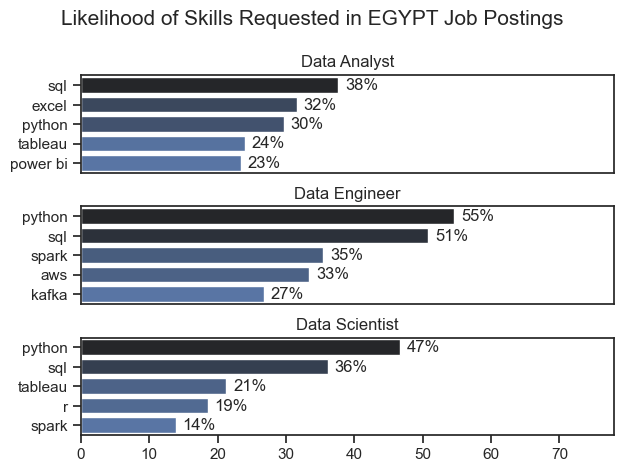

In [158]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_prec[df_prec['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in EGYPT Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

## How are in-demand skills trending for Data Analysts?

In [ ]:
# add month name column 
df_DA_Egy['month'] =df_DA_Egy['job_posted_date'].dt.month_name()

In [203]:
df_DA_Egy = df_DA_Egy.explode('job_skills')

In [ ]:
# Group by month and job_skills
df_DA_Egy_pivot = df_DA_Egy.pivot_table(index ='month' , columns = 'job_skills' , aggfunc='size' , fill_value=0)
df_DA_Egy_pivot.loc['total'] = df_DA_Egy_pivot.sum()

In [ ]:
# sorts by count
df_DA_Egy_pivot = df_DA_Egy_pivot[df_DA_Egy_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_Egy_pivot.drop('total' , axis =0 , inplace=True)


In [209]:
df_DA_Egy_pivot = df_DA_Egy_pivot.reset_index()

In [ ]:
# add month num to sort values by month
df_DA_Egy_pivot['month_num']=pd.to_datetime(df_DA_Egy_pivot['month'] , format= '%B').dt.month


In [213]:
df_DA_Egy_pivot.sort_values(by='month_num' , inplace=True)

In [216]:
df_DA_Egy_pivot.set_index('month' , inplace= True)

In [218]:
df_DA_Egy_pivot.drop('month_num' , axis =1 , inplace= True)

In [219]:
df_DA_Egy_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
month,,,,,,,,,,,,,,,,,,,,,
January,21,17,15,14,11,7,0,2,3,1,...,0,0,0,0,0,0,0,0,0,0
February,14,16,14,7,7,4,6,5,6,5,...,0,0,0,0,0,0,0,0,0,0
March,7,12,8,6,7,3,2,5,4,2,...,1,1,0,0,0,0,0,0,1,0
April,9,3,5,6,1,4,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
May,4,2,3,3,3,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
June,2,5,3,5,4,2,0,2,1,2,...,0,0,0,0,0,0,0,0,0,0
July,13,13,8,6,9,2,0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
August,25,20,16,12,13,2,4,3,1,2,...,0,0,0,0,0,0,0,1,0,1
September,17,9,16,12,12,5,4,2,1,3,...,0,0,1,0,0,0,0,0,0,0


In [221]:
df_DA_Egy_pivot.iloc[: ,:5]

job_skills,sql,excel,python,tableau,power bi
month,,,,,
January,21,17,15,14,11
February,14,16,14,7,7
March,7,12,8,6,7
April,9,3,5,6,1
May,4,2,3,3,3
June,2,5,3,5,4
July,13,13,8,6,9
August,25,20,16,12,13
September,17,9,16,12,12


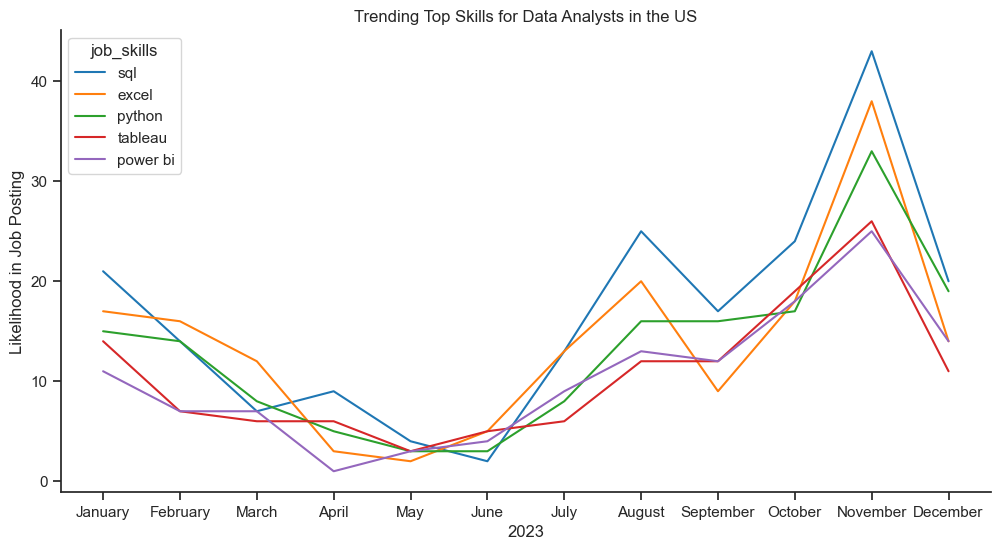

In [233]:
plt.figure(figsize=(12, 6)) 

sns.set_theme(style='ticks')
df_plot =df_DA_Egy_pivot.iloc[: ,:5]
sns.lineplot(data =df_plot ,
            dashes= False , 
            palette='tab10' )

sns.despine() 
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

# for i in range(5):
#     plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()

### Salary Distribution by Job Title  for us 

In [252]:
df_us = df[df['job_country'] == 'United States']
df_us = df_us.dropna(subset='salary_year_avg')

In [256]:
# filter the df for the top 6 job titles
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
df_us_top6=df_us[df_us['job_title_short'].isin(job_titles)]


In [257]:
 #order the job titles by median salary
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

In [258]:
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

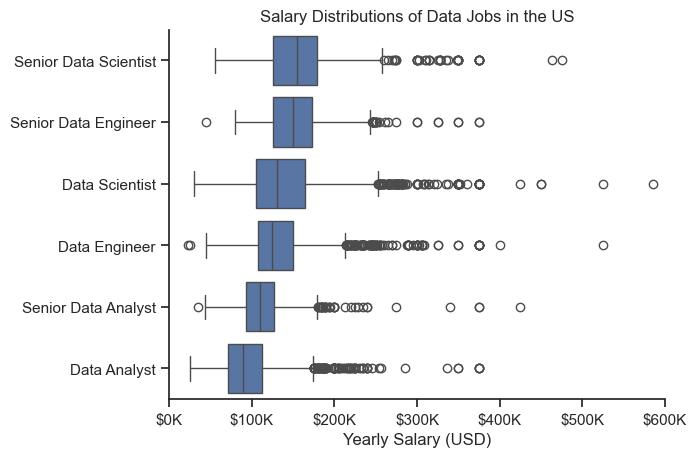

In [261]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()